# Classifying Hand-Written English Alphabets Using Neural Networks

## Importing the Dependencies

We will need Tensorflow, Numpy and Scipy for this Classification

In [1]:
import numpy as np
import tensorflow as tf
from scipy import io as spio
import time

## Loading the Data

In [2]:
emnist = spio.loadmat("dataset/matlab/emnist-letters.mat")

In [3]:
# load training dataset
x_train = emnist["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = emnist["dataset"][0][0][0][0][0][1]

In [4]:
# load test dataset
x_test = emnist["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = emnist["dataset"][0][0][1][0][0][1]

In [5]:
# store labels for visualization
train_labels = y_train
test_labels = y_test

In [6]:
x_train.shape

(124800, 784)

In [7]:
# normalize
x_train /= 255
x_test /= 255

In [8]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
# reshape using matlab order
x_train = x_train.reshape(x_train.shape[0], 784, order="A")
x_test = x_test.reshape(x_test.shape[0], 784, order="A")

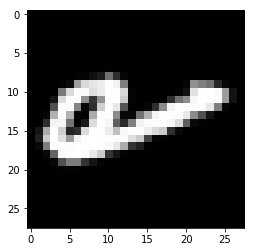

In [36]:
# which sample to look at
samplenum = 120001

import matplotlib.pyplot as plt
%matplotlib inline

img = x_train[samplenum]


# visualize image
plt.imshow(img.reshape(28,28), cmap='gist_gray')

In [42]:
x_train.shape

(124800, 784)

In [43]:
y_train.shape

(124800, 1)

In [44]:
y_train = y_train.reshape(y_train.shape[0])

In [45]:
n_values = np.max(y_train) + 1

In [46]:
n_values

27

In [47]:
y_train = np.eye(n_values)[y_train]

In [48]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [49]:
y_train.shape

(124800, 27)

In [50]:
y_test = y_test.reshape(y_test.shape[0])
n_val_test = np.max(y_test) + 1
y_test = np.eye(n_values)[y_test]

In [51]:
y_test[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# which sample to look at
# samplenum = 12001

# import matplotlib.pyplot as plt
# %matplotlib inline

# img = x_train[samplenum]

# # visualize image
# plt.imshow(img, cmap='gist_gray')

In [21]:
# show label for sample image
# train_labels[samplenum][0]

In [52]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None,784])

In [53]:
# VARIABLES
W = tf.Variable(tf.zeros([784,27]))
b = tf.Variable(tf.zeros([27]))

In [54]:
#CREATE GRAPH OPERATIONS
y = tf.matmul(x,W) + b

In [55]:
# LOSS FUNCTION
y_true = tf.placeholder(tf.float32,[None,27])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [26]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [27]:
# CREATE SESSION
init = tf.global_variables_initializer()

In [28]:
start = time.time()
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(1000):
        
        sess.run(train,feed_dict={x:x_train,y_true:y_train})
    
    #Evaluate
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    print(sess.run(acc,feed_dict={x:x_test,y_true:y_test}))
end = time.time()

0.7134615


In [29]:
time_elapsed = end - start
print("Time Elapsed: " + str(time_elapsed))

Time Elapsed: 1069.096366405487


In [31]:
print(time_elapsed/60)

17.818272773424784
